In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
import qiskit.quantum_info as qi
import numpy as np
from matplotlib import pyplot as plt
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector, plot_state_city
from scipy.linalg import sqrtm
from qtm import *
from qtm_multiqubit import *
import constant 


Step 0: 0.7136
Step 10: 0.7204999999999999
Step 20: 0.7168
Step 30: 0.41200000000000003
Step 40: 0.07909999999999995
Step 50: 0.010800000000000032
Step 60: 0.0016000000000000458
Step 70: 9.999999999998899e-05
Step 80: 0.0
Step 90: 0.0


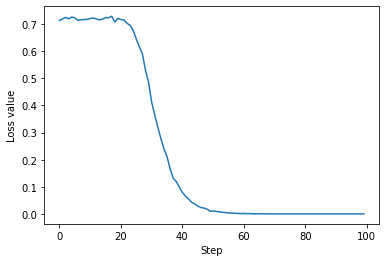

In [2]:
num_qubits = 3
counter = "000"
thetas = np.zeros((2, num_qubits, 3))
theta = np.random.uniform(0, 2*np.pi)

qc = QuantumCircuit(num_qubits, num_qubits)
qc = create_ghz_state(qc, theta)

loss_values = []
for i in range(0, 100):
    thetas = thetas - constant.learning_rate*grad_l_multiqubit(qc, u_cluster_3qubit, thetas, 1/2, np.pi/2, counter)
    qc_copy = u_cluster_3qubit(qc.copy(), thetas)
    loss = 1 - measure(qc_copy, range(qc_copy.num_qubits), range(qc_copy.num_qubits), counter)
    loss_values.append(loss)
    if i % 10 == 0:
        print('Step ' + str(i) + ': ' + str(loss) )


plt.show()
plt.plot(loss_values)
plt.xlabel("Step")
plt.ylabel("Loss value")
plt.show()

In [18]:
psi = qi.Statevector.from_instruction(qc)
rho_psi = qi.DensityMatrix(psi)
psi_hat = qi.Statevector(get_psi_hat_3qubit(thetas))
rho_psi_hat = qi.DensityMatrix(psi_hat)

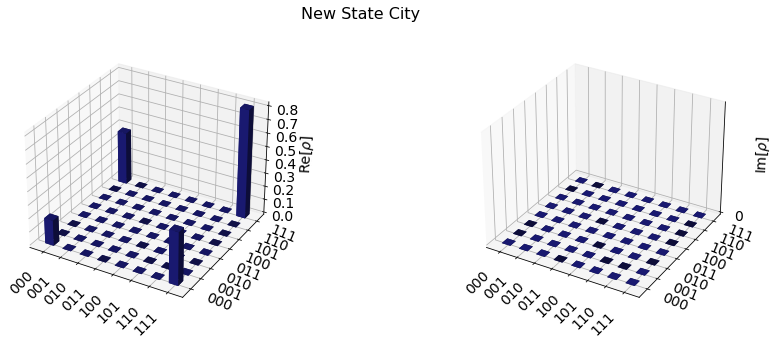

In [19]:
plot_state_city(rho_psi, color=['midnightblue', 'midnightblue'],
     title="New State City")

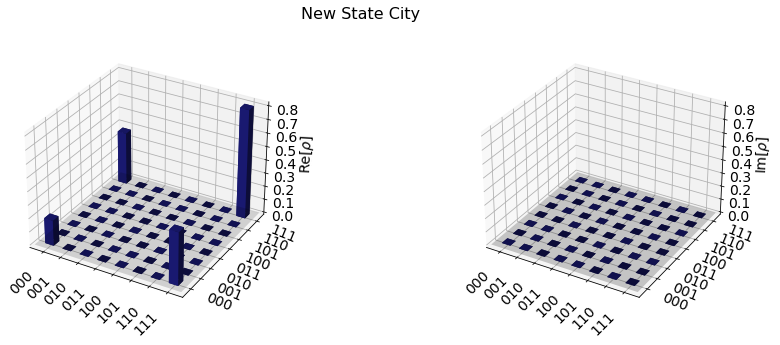

In [20]:
plot_state_city(rho_psi_hat, color=['midnightblue', 'midnightblue'],
     title="New State City")

In [21]:
psi1 = np.expand_dims(psi.data, axis=0).transpose()
psi_hat1 = np.expand_dims(psi_hat.data, axis=0).transpose()

print("Trace: ", trace_distance(rho_psi, rho_psi_hat))
print("Fidelity: ", trace_fidelity(rho_psi, rho_psi_hat))
print("Inner prodcut: ", np.linalg.norm(inner_product(psi1, psi_hat1))**2)

Trace:  0.0016607861182699557
Fidelity:  (0.9999986208937839-2.1303932058371333e-19j)
Inner prodcut:  0.9999972417894692


In [22]:
from kaleidoscope import bloch_sphere
bloch_sphere([psi, psi_hat])